#Assignment 2
## Zayed Azim Hashimi 26467

# **Logistic Regression**

In [50]:
#Chunk taken from "01/03 aR Logisitic Regression Simply Applied"
# pandas for Data Preprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# sklearn is a machine learning library that provides functions to build models
# StandardScaler is used to scale the data (important for KNN)
from sklearn.preprocessing import StandardScaler

# KNeighborsClassifier is the KNN model itself
from sklearn.neighbors import KNeighborsClassifier

# train_test_split is used to split the data into training and testing sets
from sklearn.model_selection import train_test_split # used to train the model

# Accuracy and other metrics to evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

## **Data PreProcessing**

In [51]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('insurance_claims.csv')  # Adjust filename if needed



Saving insurance_claims.csv to insurance_claims (2).csv


In [52]:
# dimensions of data set
df.shape

(10000, 26)

In [53]:
# printing first few rows of dataset
df.head()

,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,...,ClaimInvolvedCovers,DamageImportance,ConnectionBetweenParties,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
0,PH006844,V89073,Lawyer,2014-02-16,Motorcycle,75165,0,2,76,31,...,Liability,5,No,81328,0.652447,0,37246.774861,17,0,0.0
1,PH004230,V64262,Teacher,2011-09-14,Car,45809,1,1,97,67,...,Collision,8,No,88724,0.676261,0,32925.571674,19,1,0.0
2,PH004845,V91142,Business,2015-10-11,Truck,42165,0,1,176,76,...,Comprehensive,1,No,68441,0.851770,0,5817.983955,22,0,0.0
3,PH004688,V37222,Engineer,2016-04-12,Car,82232,0,1,151,71,...,Liability,9,No,44767,0.926641,0,48698.053138,22,0,0.0
4,PH006863,V57210,Business,2012-06-27,SUV,85642,0,1,81,28,...,Liability,8,No,46852,0.353562,0,38666.693932,4,0,0.0


In [54]:
# about data and its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderNumber                10000 non-null  object 
 1   FirstPartyVehicleNumber           10000 non-null  object 
 2   PolicyholderOccupation            10000 non-null  object 
 3   FirstPolicySubscriptionDate       10000 non-null  object 
 4   FirstPartyVehicleType             10000 non-null  object 
 5   PolicyholderPostCode              10000 non-null  int64  
 6   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 7   NumberOfPoliciesOfPolicyholder    10000 non-null  int64  
 8   FpVehicleAgeMonths                10000 non-null  int64  
 9   PolicyHolderAge                   10000 non-null  int64  
 10  FirstPartyLiability               10000 non-null  float64
 11  ReferenceId                       10000 non-null  object 
 12  Third

In [55]:
# statistical details of data
df.describe()

,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,FirstPartyLiability,DamageImportance,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,55160.097100,0.29040,1.596800,120.534600,48.520900,0.499122,4.942900,55240.468000,0.497711,0.149500,25208.259731,11.529500,0.399600,0.010000
std,26257.617614,0.45397,0.857265,69.264548,17.764237,0.229996,2.595518,26134.259058,0.289893,0.356598,14251.494093,6.907699,0.809929,0.099504
min,10010.000000,0.00000,1.000000,1.000000,18.000000,0.100037,1.000000,10000.000000,0.000243,0.000000,509.943433,0.000000,0.000000,0.000000
25%,31798.250000,0.00000,1.000000,60.000000,33.000000,0.302596,3.000000,32724.750000,0.246545,0.000000,12899.706361,6.000000,0.000000,0.000000
50%,55844.000000,0.00000,1.000000,120.000000,49.000000,0.498444,5.000000,55375.000000,0.494026,0.000000,25112.443702,12.000000,0.000000,0.000000
75%,78056.250000,1.00000,2.000000,181.000000,64.000000,0.699865,7.000000,77970.750000,0.747446,0.000000,37717.133789,18.000000,1.000000,0.000000
max,99998.000000,1.00000,4.000000,239.000000,79.000000,0.899952,9.000000,99997.000000,0.999917,1.000000,49994.340283,23.000000,4.000000,1.000000


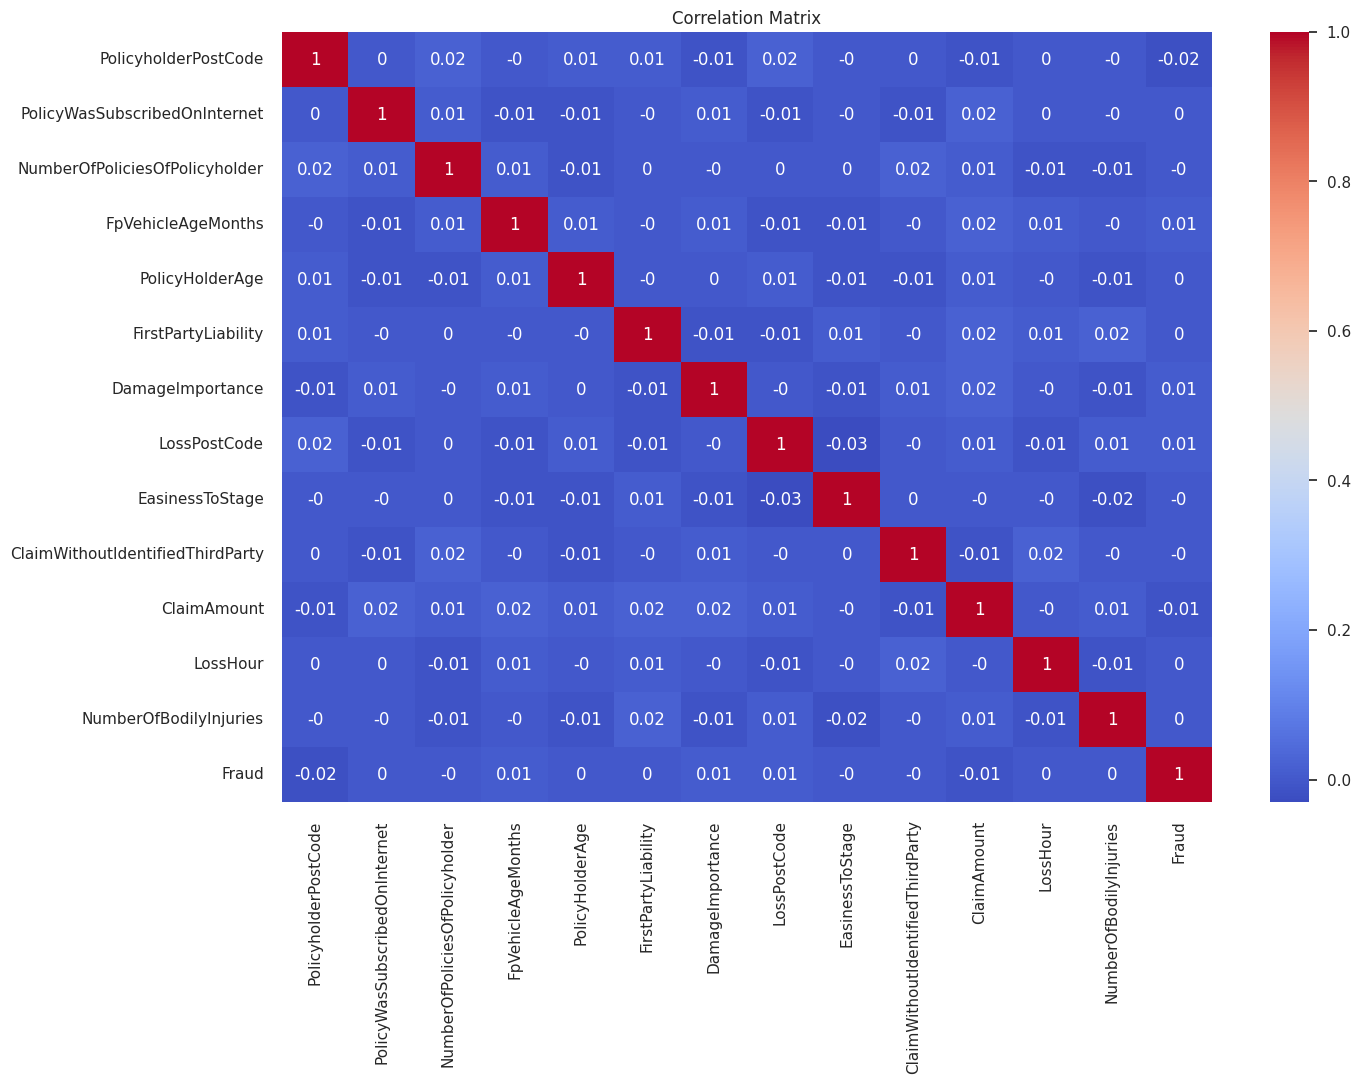

In [56]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


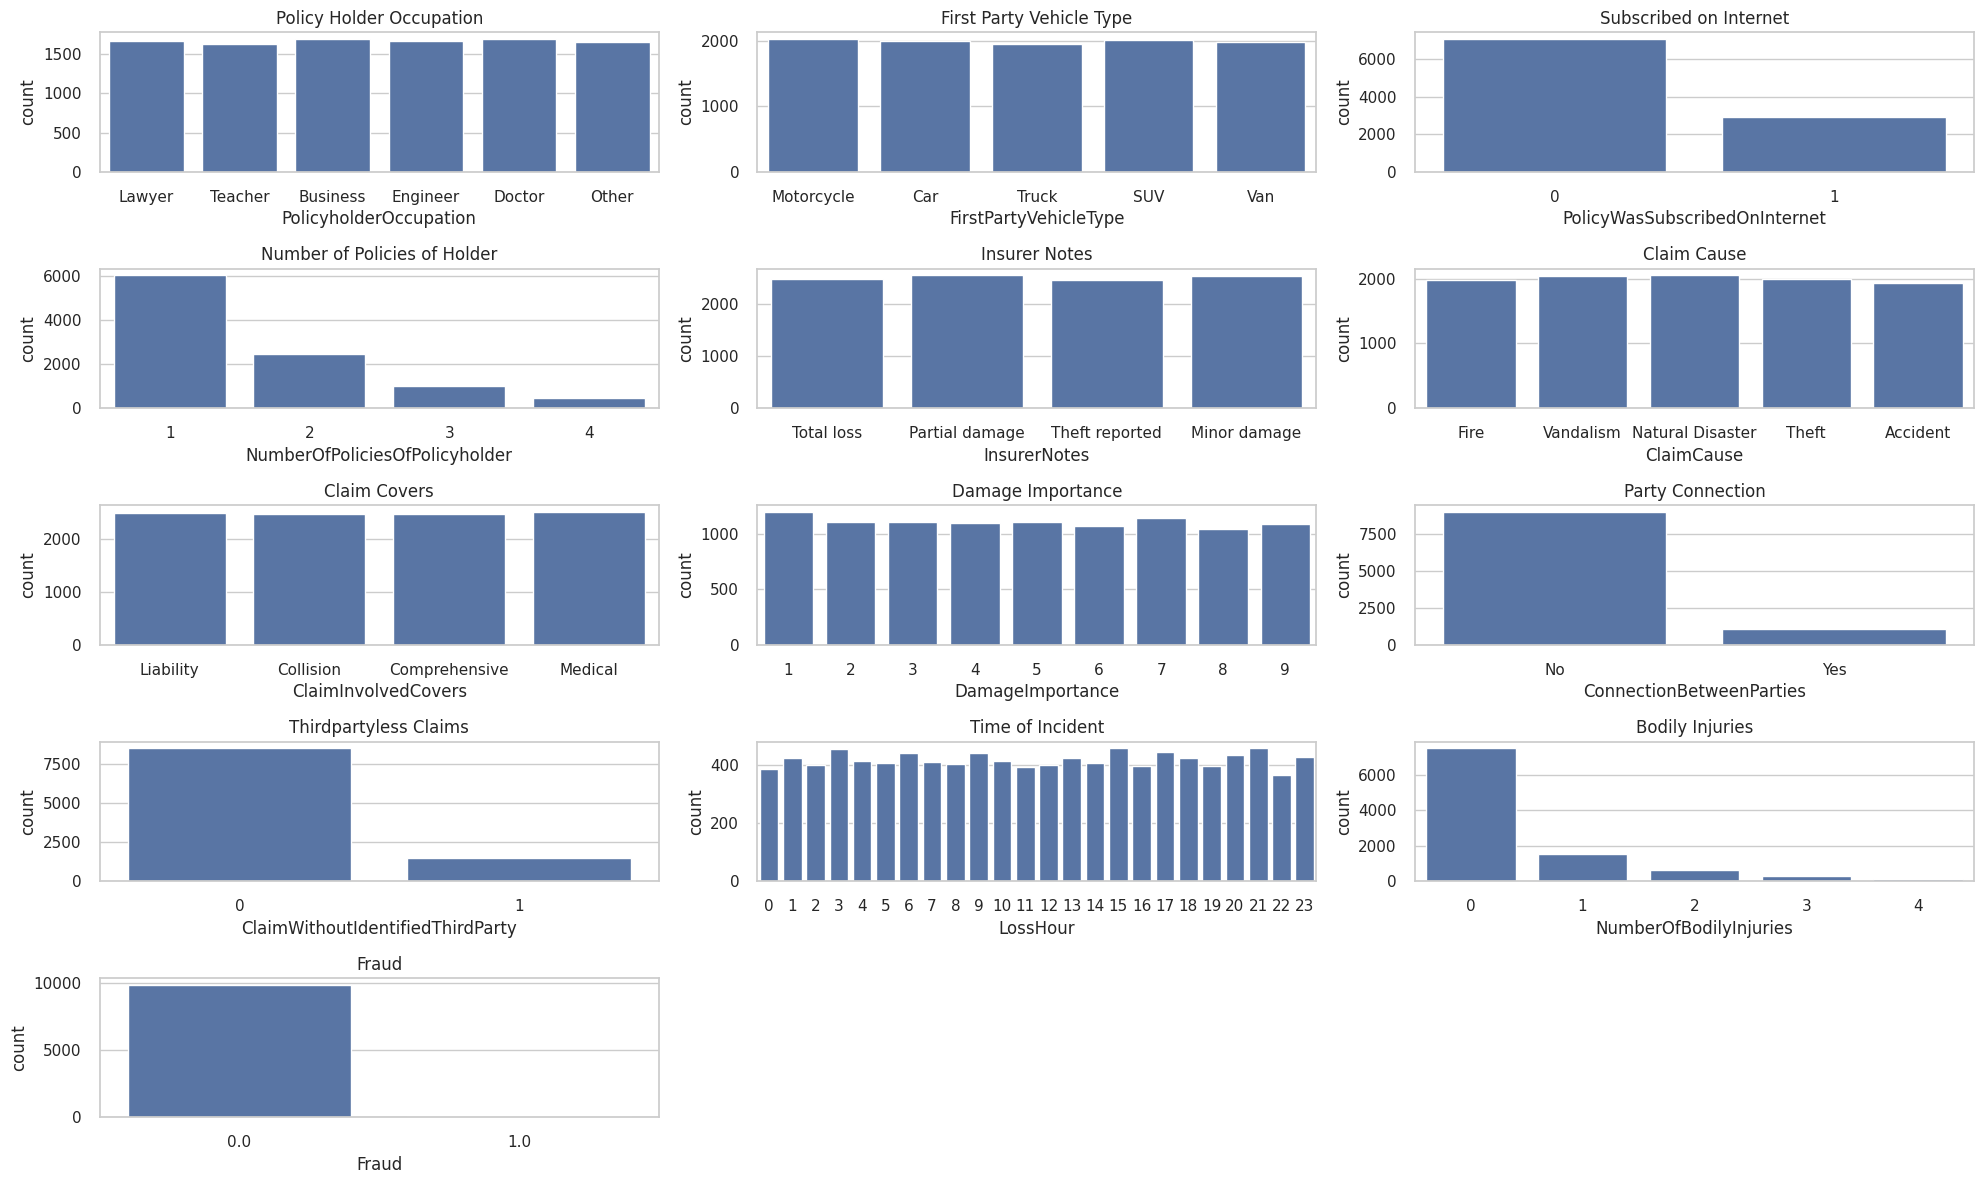

In [57]:

# Countplot for categorical variables
plt.figure(figsize=(20, 12))

#1
plt.subplot(5, 3, 1)
sns.countplot(data=df, x='PolicyholderOccupation')
plt.title('Policy Holder Occupation')

#2
plt.subplot(5, 3, 2)
sns.countplot(data=df, x='FirstPartyVehicleType')
plt.title('First Party Vehicle Type')

# 3
plt.subplot(5, 3, 3)
sns.countplot(data=df, x='PolicyWasSubscribedOnInternet')
plt.title('Subscribed on Internet')

# 4
plt.subplot(5, 3, 4)
sns.countplot(data=df, x='NumberOfPoliciesOfPolicyholder')
plt.title('Number of Policies of Holder')

# 5
plt.subplot(5, 3, 5)
sns.countplot(data=df, x='InsurerNotes')
plt.title('Insurer Notes')

# 6
plt.subplot(5, 3, 6)
sns.countplot(data=df, x='ClaimCause')
plt.title('Claim Cause')

#7
plt.subplot(5, 3, 7)
sns.countplot(data=df, x='ClaimInvolvedCovers')
plt.title('Claim Covers')

#8
plt.subplot(5, 3, 8)
sns.countplot(data=df, x='DamageImportance')
plt.title('Damage Importance')

#9
plt.subplot(5, 3, 9)
sns.countplot(data=df, x='ConnectionBetweenParties')
plt.title('Party Connection')

#10
plt.subplot(5, 3, 10)
sns.countplot(data=df, x='ClaimWithoutIdentifiedThirdParty')
plt.title('Thirdpartyless Claims')

#11
plt.subplot(5, 3, 11)
sns.countplot(data=df, x='LossHour')
plt.title('Time of Incident')

#12
plt.subplot(5, 3, 12)
sns.countplot(data=df, x='NumberOfBodilyInjuries')
plt.title('Bodily Injuries')

#13
plt.subplot(5, 3, 13)
sns.countplot(data=df, x='Fraud')
plt.title('Fraud')

plt.tight_layout()
plt.show()


## **One-Hot Encoding**

In [58]:
#Maps the Variable ConnectionBetweenParties from "Yes" and "No" to Binary, so it can be used by the logistic regression model.
df['ConnectionBetweenParties'] = df['ConnectionBetweenParties'].map({'Yes': 1, 'No': 0})
df.head()

,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,...,ClaimInvolvedCovers,DamageImportance,ConnectionBetweenParties,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
0,PH006844,V89073,Lawyer,2014-02-16,Motorcycle,75165,0,2,76,31,...,Liability,5,0,81328,0.652447,0,37246.774861,17,0,0.0
1,PH004230,V64262,Teacher,2011-09-14,Car,45809,1,1,97,67,...,Collision,8,0,88724,0.676261,0,32925.571674,19,1,0.0
2,PH004845,V91142,Business,2015-10-11,Truck,42165,0,1,176,76,...,Comprehensive,1,0,68441,0.851770,0,5817.983955,22,0,0.0
3,PH004688,V37222,Engineer,2016-04-12,Car,82232,0,1,151,71,...,Liability,9,0,44767,0.926641,0,48698.053138,22,0,0.0
4,PH006863,V57210,Business,2012-06-27,SUV,85642,0,1,81,28,...,Liability,8,0,46852,0.353562,0,38666.693932,4,0,0.0


In [59]:
#This following Chunk of Code works to do One-Hot encoding, converting the categorical features into binary codes which can be utilized by the regression model.
# List made with the columns to be One-Hot encoded so it can be used in a loop.
cols_to_encode = ['PolicyholderOccupation','FirstPartyVehicleType', 'InsurerNotes', 'ClaimCause', 'ClaimInvolvedCovers']

# One-hot encode the columns, no need to fillna(0) as no Null data
new_df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# Map new columns to binary: For Loop Generated using Google Gemini (Generative AI)
for col in new_df.columns:
    if any(c in col for c in cols_to_encode):  # Check if the column is a one-hot encoded column so that the code does not produce an error when re run
        new_df[col] = new_df[col].map({True: 1, False: 0}).fillna(0) #

# Display the first few rows of the updated DataFrame
print(new_df.head())

#Below is an example for if this was done manually without lists
# new_df['ClaimCause_Vandalism'] = new_df['ClaimCause_Vandalism'].map({True: 1, False: 0}).fillna(0)
# new_df['ClaimCause_Theft'] = new_df['ClaimCause_Theft'].map({True: 1, False: 0}).fillna(0)
# new_df['ClaimCause_Natural Disaster'] = new_df['ClaimCause_Natural Disaster'].map({True: 1, False: 0}).fillna(0)
# new_df['ClaimCause_Fire'] = new_df['ClaimCause_Fire'].map({True: 1, False: 0}).fillna(0)


  PolicyholderNumber FirstPartyVehicleNumber FirstPolicySubscriptionDate  \
0           PH006844                  V89073                  2014-02-16   
1           PH004230                  V64262                  2011-09-14   
2           PH004845                  V91142                  2015-10-11   
3           PH004688                  V37222                  2016-04-12   
4           PH006863                  V57210                  2012-06-27   

   PolicyholderPostCode  PolicyWasSubscribedOnInternet  \
0                 75165                              0   
1                 45809                              1   
2                 42165                              0   
3                 82232                              0   
4                 85642                              0   

   NumberOfPoliciesOfPolicyholder  FpVehicleAgeMonths  PolicyHolderAge  \
0                               2                  76               31   
1                               1             

### Checking for Duplicates

In [60]:
# Looking for Duplicate Rows
duplicate_rows_df=new_df[new_df.duplicated()]
print("No. of Duplicate rows", duplicate_rows_df.shape)
new_df.duplicated().sum()

No. of Duplicate rows (0, 40)


0

In [61]:
new_df.count()

,0
PolicyholderNumber,10000
FirstPartyVehicleNumber,10000
FirstPolicySubscriptionDate,10000
PolicyholderPostCode,10000
PolicyWasSubscribedOnInternet,10000
NumberOfPoliciesOfPolicyholder,10000
FpVehicleAgeMonths,10000
PolicyHolderAge,10000
FirstPartyLiability,10000
ReferenceId,10000


### Checking For Outliers Value

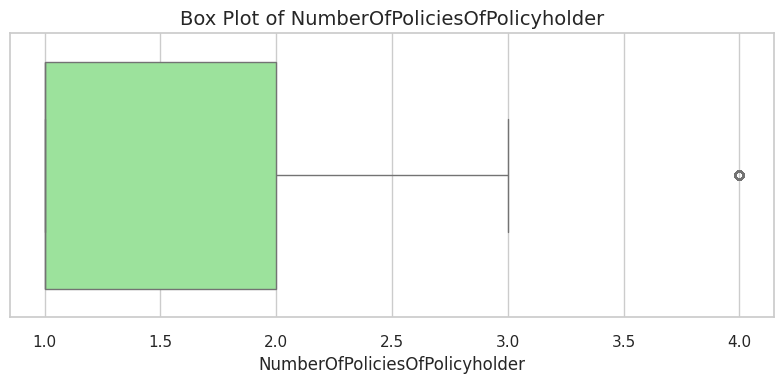

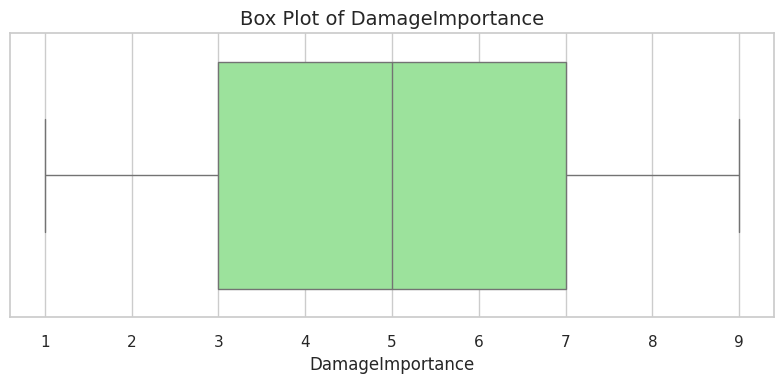

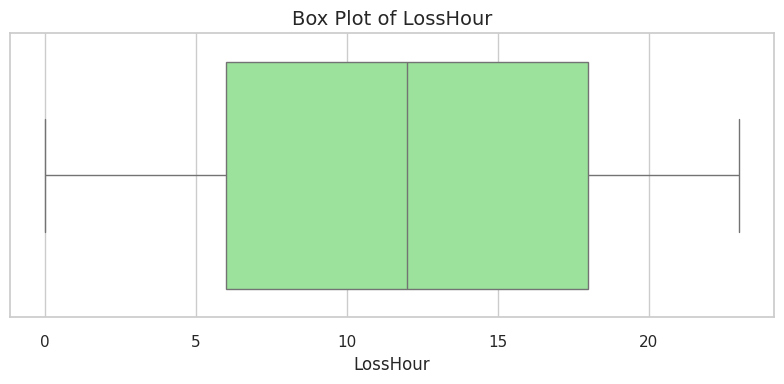

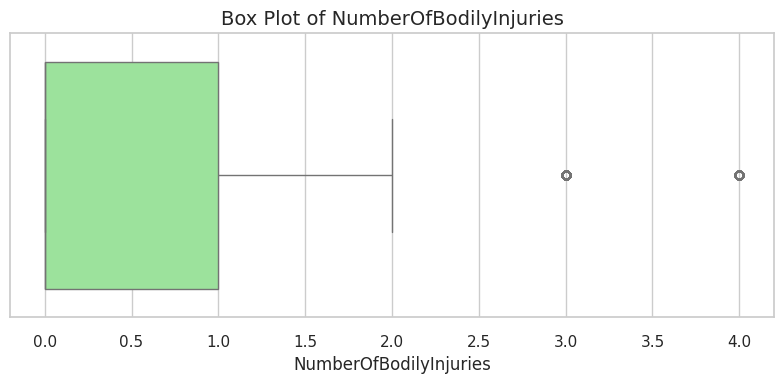

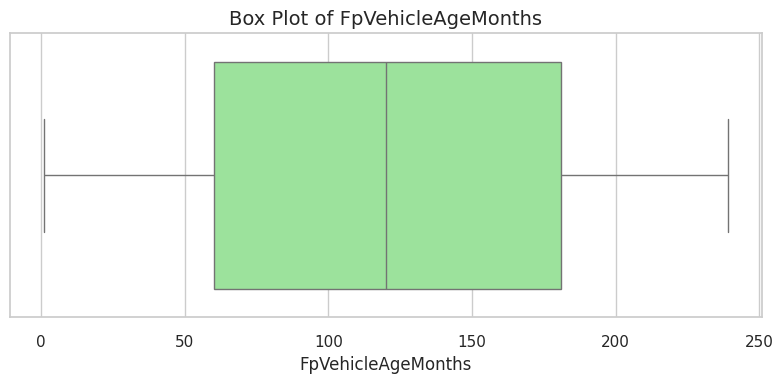

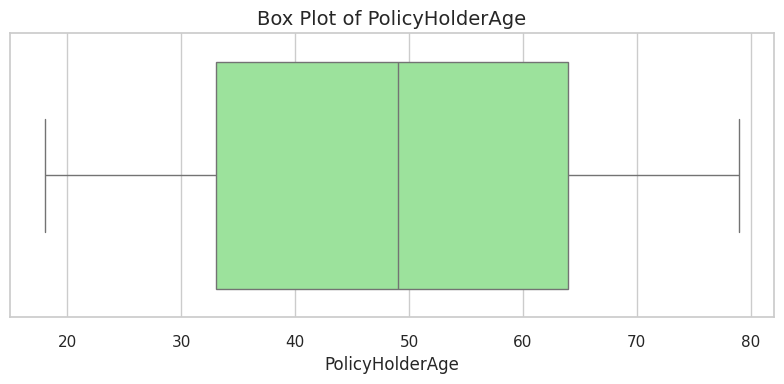

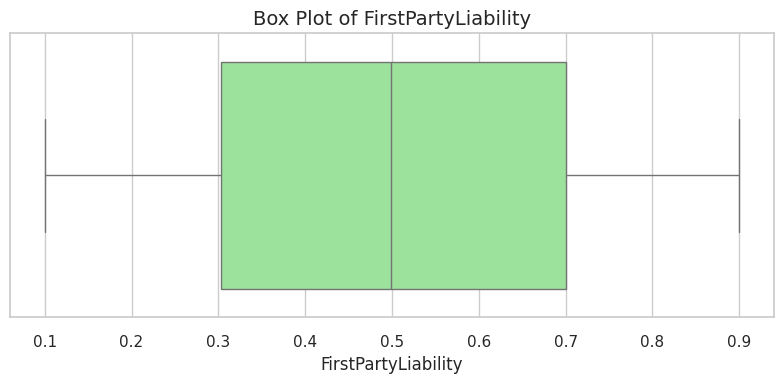

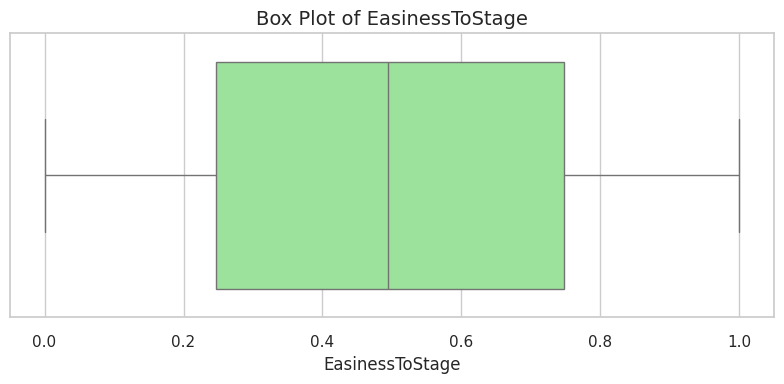

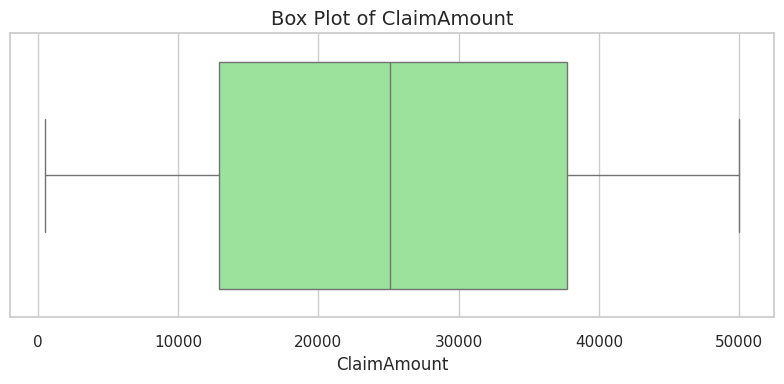

In [62]:
#Edited from "01/03 aR Logistic Regression Simply Applied"
sns.set_palette("rocket")  # setting  pallete
sns.set(style="whitegrid")  # Set the style of the grid

# List of columns to plot
col = ['NumberOfPoliciesOfPolicyholder',  'DamageImportance', 'LossHour', 'NumberOfBodilyInjuries', 'FpVehicleAgeMonths', 'PolicyHolderAge', 'FirstPartyLiability', 'EasinessToStage', 'ClaimAmount']

# Loop through each column and create a box plot
for i in col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[i], color="lightgreen")
    plt.title(f'Box Plot of {i}', fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.tight_layout()
    plt.show()


In [63]:
new_df.shape

(10000, 40)

### We are applying logistic regression model without

- Outlier Treatment as it is not needed for the data set. The boxplot shows very few outliers and an even distribution  for majority of the data points in the data set
- Replacing Missing Values with suitable ones: There are no missing values so there is no need to do this.

###We are Applying the following:
- Dropping Unnecessary Features
- Standard Scaling
- Class Balancing

## **Logistic Regression**

## Model Building


In [64]:
#Checking for missing values
missing_values = new_df.isnull().sum()

print(missing_values)


PolicyholderNumber                   0
FirstPartyVehicleNumber              0
FirstPolicySubscriptionDate          0
PolicyholderPostCode                 0
PolicyWasSubscribedOnInternet        0
NumberOfPoliciesOfPolicyholder       0
FpVehicleAgeMonths                   0
PolicyHolderAge                      0
FirstPartyLiability                  0
ReferenceId                          0
ThirdPartyVehicleNumber              0
LossDate                             0
DamageImportance                     0
ConnectionBetweenParties             0
LossPostCode                         0
EasinessToStage                      0
ClaimWithoutIdentifiedThirdParty     0
ClaimAmount                          0
LossHour                             0
NumberOfBodilyInjuries               0
Fraud                                0
PolicyholderOccupation_Doctor        0
PolicyholderOccupation_Engineer      0
PolicyholderOccupation_Lawyer        0
PolicyholderOccupation_Other         0
PolicyholderOccupation_Te

### Dropping Features

In [65]:
#Droppign the columns which are of "Object" and therefore cannot be used for the logistic analysis
#Using Google Gemini Generative AI
objects = new_df.select_dtypes(include=['object']).columns
new_df2 = new_df.drop(objects, axis=1)

In [66]:
#Dropping more features to improve model
columns_to_drop = ['PolicyholderPostCode','LossPostCode', 'EasinessToStage','LossHour','FirstPartyLiability','PolicyWasSubscribedOnInternet','NumberOfBodilyInjuries','PolicyHolderAge']
new_df2 = new_df2.drop(columns_to_drop, axis= 1)

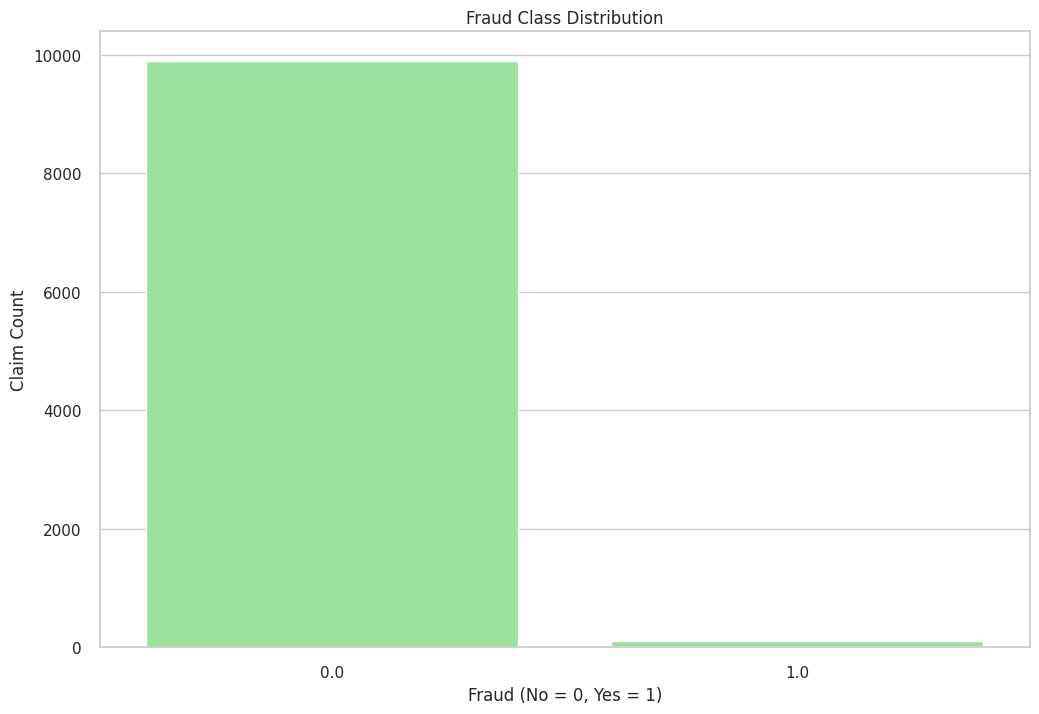

In [67]:
# As shown in subplots Fraud has a very imbalanced class distribution, this is shown again here

plt.figure(figsize=(12,8))
sns.countplot(data=new_df2, x='Fraud', color = "lightgreen")
plt.title('Fraud Class Distribution')
plt.xlabel("Fraud (No = 0, Yes = 1)")
plt.ylabel("Claim Count")
plt.show()


In [68]:
#Seperate Target variable (y) from the features (X)
X_dropped = new_df2.drop('Fraud', axis=1)
X = X_dropped.values
y = new_df2['Fraud']


In [69]:
# dividing data into train and test data with test size 30% with random_state keeping results consistent everytime code is run
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [70]:
# checking dimensions of train/test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 25)
(7000,)
(3000, 25)
(3000,)


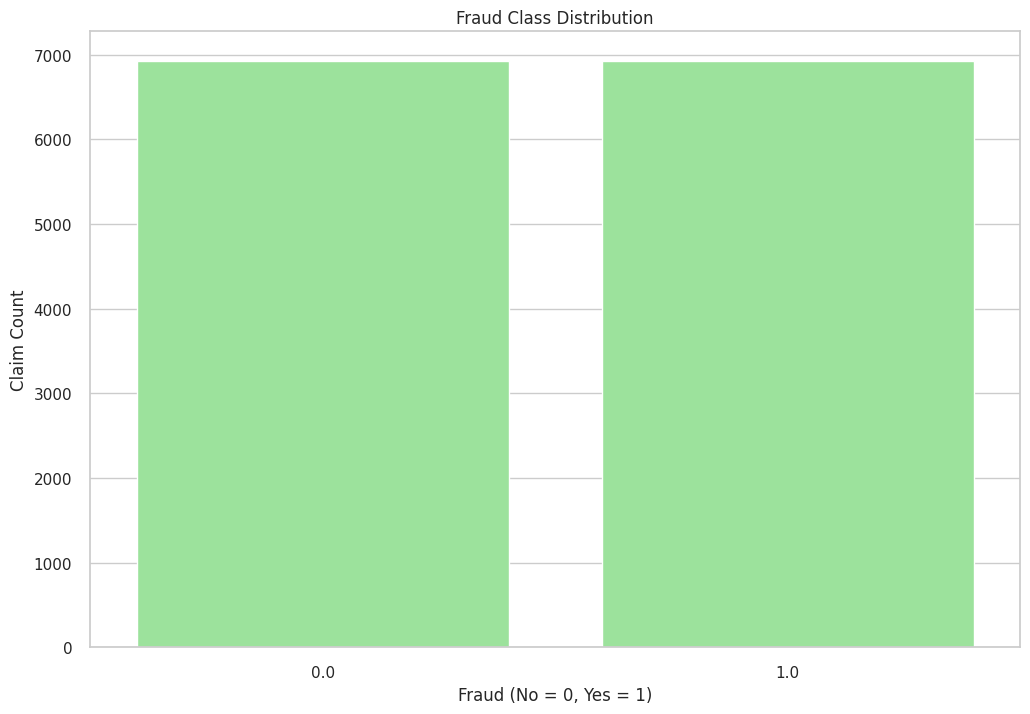

In [71]:
#Applying SMOTE to training data for class balancing
#Not using undersampling as the sample size would be too small and disgard too much important historical data
#Not using Class weight balancing as it is not as affective as SMOTE for an extreme imbalance
#Code generated by Google Gemini (Generative AI), edited to only act on the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#New Data Frame with Balanced classes created with SMOTE
#Code generated by Google Gemini (Generative AI)
balanced_df = pd.DataFrame(X_train, columns=X_dropped.columns)
balanced_df['Fraud'] = y_train

#The following code is to verify that the SMOTE has occured and the classes are now evenly distributed
plt.figure(figsize= (12,8))
sns.countplot(data=balanced_df, x='Fraud', color = "lightgreen")
plt.title('Fraud Class Distribution')
plt.xlabel("Fraud (No = 0, Yes = 1)")
plt.ylabel("Claim Count")
plt.show()

In [72]:
# checking dimensions of train/test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13858, 25)
(13858,)
(3000, 25)
(3000,)


In [73]:
import numpy as np

# Replace NaNs with the column-wise mean
# Not really needed as no NaNs but good practice
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_train))


###Standarziation, Regularization, and Logistic Regression:

In [74]:
#Standarization before Regularization
#Syntax generated with Google Gemini generative AI
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Apply Logistic Regression with regularization
from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression()
# L1 Regularization
log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

# L2 Regularization
#log_reg = LogisticRegression(penalty='l2', C=0.1)
#log_reg = LogisticRegression(penalty='l2', C=0.1, class_weight='balanced')

# Elastic Net Regularization
#log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1)

log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)

print(y_pred)
print(y_pred.shape)

[0. 0. 1. ... 0. 0. 0.]
(3000,)


In [75]:
#probablities
probablities = log_reg.predict_proba(X_test)

for i in range(len(y_test)):
    print(probablities[i], '-->', y_pred[i])

[0.55472424 0.44527576] --> 0.0
[0.56301529 0.43698471] --> 0.0
[0.45670715 0.54329285] --> 1.0
[0.67930137 0.32069863] --> 0.0
[0.54524357 0.45475643] --> 0.0
[0.35350592 0.64649408] --> 1.0
[0.52376323 0.47623677] --> 0.0
[0.4707581 0.5292419] --> 1.0
[0.32205868 0.67794132] --> 1.0
[0.4847827 0.5152173] --> 1.0
[0.23508855 0.76491145] --> 1.0
[0.33118136 0.66881864] --> 1.0
[0.23835625 0.76164375] --> 1.0
[0.74218477 0.25781523] --> 0.0
[0.50505096 0.49494904] --> 0.0
[0.4163306 0.5836694] --> 1.0
[0.72282352 0.27717648] --> 0.0
[0.90375324 0.09624676] --> 0.0
[0.72709588 0.27290412] --> 0.0
[0.58265956 0.41734044] --> 0.0
[0.47944385 0.52055615] --> 1.0
[0.59067174 0.40932826] --> 0.0
[0.51899091 0.48100909] --> 0.0
[0.76983123 0.23016877] --> 0.0
[0.46762373 0.53237627] --> 1.0
[0.5459106 0.4540894] --> 0.0
[0.3428658 0.6571342] --> 1.0
[0.57136917 0.42863083] --> 0.0
[0.3453271 0.6546729] --> 1.0
[0.47784156 0.52215844] --> 1.0
[0.65300514 0.34699486] --> 0.0
[0.39463928 0.605360

0.592

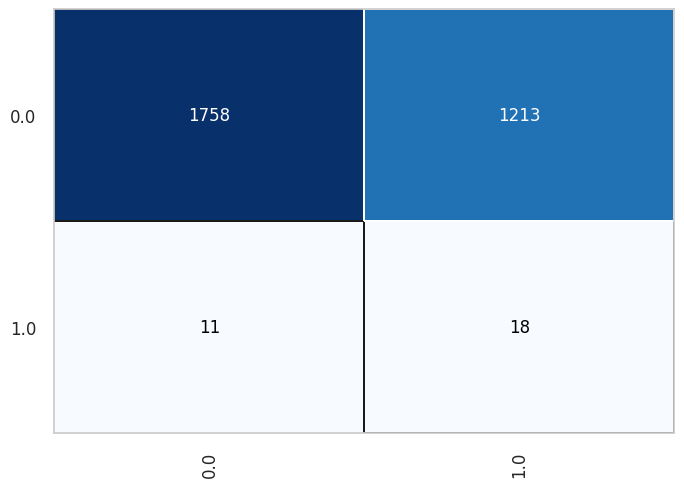

In [76]:
# confusion matrix
cm = ConfusionMatrix(log_reg, cmap='Blues')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)



In [77]:
logistic_normal = (classification_report(y_test, y_pred))
print(logistic_normal)

#AUC-ROC
#Using Google Gemini Generative AI
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74      2971
         1.0       0.01      0.62      0.03        29

    accuracy                           0.59      3000
   macro avg       0.50      0.61      0.39      3000
weighted avg       0.98      0.59      0.73      3000

AUC: 0.6062048073909864


In [78]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.592


#Insights and Recommendations
##Model Performance:

This logistic regression model aims to classify and predict fraudulent and non-fraudulent insurance claims using the dataset. This dataset has a variety of different features, initially having 24 features besides fraud. To create the model, SMOTE was used to handle class imbalances, Standardization was used, and L1 (Lasso) regularization was used, and feature selection was used to optimize the meeting.

**Accuracy**: The model achieved an accuracy of 0.592 or 59.2% meaning that in the test data it correctly identified whether an instance was fraud or not fraud 59.2% of the time. This accuracy is relatively low. However, it is important to note that due to the significant class imbalance in the dataset, accuracy alone is not a very reliable metric and must be paired with other metrics to give a strong understanding of model performance. To explain this issue further, due to the vast non fraudulent cases in comparison to the fraudulent cases, a model that predicted the majority of the cases being non fraudulent would have a high accuracy.

**Precision and Recall**: For detecting non fraud the precision of 0.99 means the model has high  precision. This correctly classifies non-fraud cases 99% of the time. However, the very low precision of 0.01 for detecting fraud means that only 1% of the cases the model has labelled as fraud were actually fraud, with the rest being false positives (non-frauds being labelled as frauds). This precision can be explained by the class imbalance as the model is focusing on maximizing its precision for the class that is the significant majority in the data (non fraud) and therefore deprioritizes its performance in the minority class (fraud) as focusing on optimizing for the majority class minimizes the overall error, although SMOTE was applied to reduce this somewhat.

When it comes to recall, the recall for 0 (non fraud) of 0.59 correctly identifies 59% of the non-fraudulent claims. The recall for 1 (Fraud) of 0.62 means the model correctly identifies 62% of the actually fraudulent claims. However, this also suggests that 38% of fraudulent claims are being treated as false negatives and have been missed by the model.

**F1-Score**: f1 score of 0.03 for fraud tells us the harmonic mean between precision and recall. In this case it is very low due to precision being 0.01, an extremely low value.

**AUC-ROC**: AUC-ROC measures the models ability to differentiate between fraudulent and non-fraudulent cases. In this case the AUC score of 0.6062 suggests that the model does show an ability to distinguish between fraudulent and non-fraudulent claims, however an AUC-ROC score between 0.6 and 0.7 is generally considered to be poor discrimination. However, in this case as false negatives (cases where the model detects no fraud but there is fraud) are very costly, having a lower AUC-ROC and prioritizing having a higher recall instead may be preferred.

**Confusion Matrix**: Looking at the confusion matrix we see that the model correctly predicted 1758 cases as non-fraud and 18 out of 29 cases of Fraud correctly. However, when it comes to False positives, where the model has detected fraud but actually it was non-fraud is 1213. When it comes to False Negatives, where the model has detected no fraud but there was actually fraud there were 11 instances. From this confusion matrix we can see the model has a good ability to identify non-fraudulent claims, with the large number of true negatives. However, the relatively high number of false negatives compared to true positives shows that the data is missing a large number of fraudulent cases which is detrimental to the company.

##Strength of Model:
The strength of the model can be seen  in various ways, particularly in its effectiveness despite the quality of the data fed to it.  Firstly, despite the vast initial class imbalance in the dataset, after SMOTE and L1 (Lasso) regularization being applied the model does not overfit, making it better at generalizing to new data and cases. The SMOTE technique helped address the class imbalance by creating synthetic samples of the minority class which was used to help train the data. The Regularization helped penalize large coefficients helping improve the model. This mitigation of the risk of overfitting can be attributed to the implementation of class balancing techniques such as SMOTE as well as regularization.

Secondly, the use of feature selection removed many of the irrelevant features for detecting fraud further improving the model, the model generalizes well.

As mentioned above the model's recall of 62% indicates its capability to successfully detect the majority of the frauds, this model demonstrates a strong ability to identify a large portion of fraudulent claims. This high recall rate is a strength of the model as having more false alarms is better than not detecting fraud as it is not as costly for the organization.

To summarize, the strengths of this model come in its ability to handle class imbalance effectively, being robust against overfitting despite the class imbalance, and its relatively high recall rate despite the low quality of the input data and features.

##Improving Fraud Detection:
The first way to improve the fraud  detection  of the model has to do with the data itself. Firstly, the dataset needs additional features that act to effectively differentiate between fraudulent and non-fraudulent claims. The current features in the dataset are not able to effectively differentiate between fraud and non fraud cases. Similarly, nearly every feature has an extremely low correlation to fraud with the maximum correlation with fraud being PolicyholderPostCode with -0.02. This can  be done through revising which features are being tracked by the initial data collection after consultation with  industry experts, an example of such features can be Credit History and Past Claims Frequency.

The fact that the model still struggles with the fraud detection after applying SMOTE to address the class imbalances, this can mean that to improve the model alternative sampling techniques can be used to better address the class imbalance.

Although, there is a large amount of data, there is a need for high quality data over simply a large quantity of data, the higher quality the data meaning more features that help in distinguishing fraud from non fraud is essential to the improvement of the model. Currently, the model is unable to adequately distinguish between fraud and non fraud as shown by the high number of false positives in the dataset.

The model also solely relied on a basic logistic regression which  may not be the best model for fraud detection, with more complex models being more helpful.
Proper feature selection as well as feature engineering is another essential component  that should be used to improve the model.

The current performance of the model mentioned in the model performance, suggests that the existing features may not be sufficient to adequately distinguish  fraudulent and non fraudulent claims. This shows a need for more distinguishing features which would help improve the models ability to identify fraud.

The Data collection should be revised to be more relevant. Similarly the firm should make use of external data sources to get more instances particularly of fraud so the model can be trained better without having to use class balancing procedures such as SMOTE.



